In [19]:
import sqlite3
import pandas as pd
import requests
from io import BytesIO
import seaborn as sns
import matplotlib.pyplot as plt

sqlite_file_url = 'https://github.com/jknecht/baseball-archive-sqlite/releases/download/2022/lahman_1871-2022.sqlite'
response = requests.get(sqlite_file_url)
with open('lahman_1871-2022.sqlite', 'wb') as f:
    f.write(response.content)

sqlite_file = 'lahman_1871-2022.sqlite'

conn = sqlite3.connect(sqlite_file)
#salary_query = "SELECT yearID, sum(salary) as total_payroll FROM Salaries GROUP BY yearID"
salary_query = "SELECT yearID, sum(salary) as total_payroll FROM Salaries WHERE lgID == 'AL' GROUP BY yearID"
team_salaries = pd.read_sql(salary_query, conn)
team_salaries.head()

,yearID,total_payroll
0,1985,134401120.0
1,1986,157716444.0
2,1987,136088747.0
3,1988,157049812.0
4,1989,188771688.0


In [20]:
salary_query1 = "SELECT teamID, yearID, sum(salary) as total_payroll FROM Salaries GROUP BY teamID, yearID"
team_salaries = pd.read_sql(salary_query1, conn)
team_salaries

,teamID,yearID,total_payroll
0,ATL,1985,14807000.0
1,BAL,1985,11560712.0
2,BOS,1985,10897560.0
3,CAL,1985,14427894.0
4,CHA,1985,9846178.0
...,...,...,...
913,SLN,2016,143053500.0
914,TBA,2016,57097310.0
915,TEX,2016,176038723.0
916,TOR,2016,138701700.0


#**Part 1: Problem 1**


In [21]:
teaminfo = "SELECT t.teamID, t.yearID, t.franchID, t.Rank,t.Ghome, t.G as total_games,t.W as total_wins,s.total_payroll,(t.W* 100.0/t.G) as winning_percentage FROM Teams t LEFT JOIN( SELECT teamID,yearID,sum(salary) as total_payroll FROM Salaries GROUP BY teamID,yearID) s ON t.teamID = s.teamID AND t.yearID = s.yearID"
team_data = pd.read_sql(teaminfo, conn)
team_data

,teamID,yearID,franchID,Rank,Ghome,total_games,total_wins,total_payroll,winning_percentage
0,BS1,1871,BNA,3,NaN,31,20,NaN,64.516129
1,CH1,1871,CNA,2,NaN,28,19,NaN,67.857143
2,CL1,1871,CFC,8,NaN,29,10,NaN,34.482759
3,FW1,1871,KEK,7,NaN,19,7,NaN,36.842105
4,NY2,1871,NNA,5,NaN,33,16,NaN,48.484848
...,...,...,...,...,...,...,...,...,...
3010,PIT,2022,PIT,5,81.0,162,62,NaN,38.271605
3011,SDN,2022,SDP,2,81.0,162,89,NaN,54.938272
3012,SFN,2022,SFG,3,81.0,162,81,NaN,50.000000
3013,SLN,2022,STL,1,81.0,162,93,NaN,57.407407


In [22]:
team_data.isna().sum()

teamID                   0
yearID                   0
franchID                 0
Rank                     0
Ghome                  399
total_games              0
total_wins               0
total_payroll         2097
winning_percentage       0
dtype: int64

**SQL Code**


SELECT t.teamID, t.yearID, t.franchID, t.Rank,t.Ghome, t.G as total_games,t.W as total_wins,s.total_payroll,(t.W* 100.0/t.G) as winning_percentage FROM Teams t LEFT JOIN( SELECT teamID,yearID,sum(salary) as total_payroll FROM Salaries GROUP BY teamID,yearID) s ON t.teamID = s.teamID AND t.yearID = s.yearID;



I used LEFT JOIN to include all records from the "Teams" table, even if there is no matching record in the "Salaries" table. This ensures that teams with missing payroll data are still included in the result.



Missing data: The LEFT JOIN allows teams without salary information to be included in the result with NULL values in the "total_payroll" column and also missing records in the "Teams" table will be included as NULL. There will about 2097 missing values intotal_payroll.


I will use inner join to avoid this missing values and print the table.


In [23]:
teaminfo = "SELECT t.teamID, t.yearID, t.franchID, t.Rank,t.Ghome, t.G as total_games,t.W as total_wins,s.total_payroll,(t.W* 100.0/t.G) as winning_percentage FROM Teams t INNER JOIN( SELECT teamID,yearID,sum(salary) as total_payroll FROM Salaries GROUP BY teamID,yearID) s ON t.teamID = s.teamID AND t.yearID = s.yearID"
team_data = pd.read_sql(teaminfo, conn)
team_data

,teamID,yearID,franchID,Rank,Ghome,total_games,total_wins,total_payroll,winning_percentage
0,ATL,1985,ATL,5,81,162,66,14807000.0,40.740741
1,BAL,1985,BAL,4,81,161,83,11560712.0,51.552795
2,BOS,1985,BOS,5,81,163,81,10897560.0,49.693252
3,CAL,1985,ANA,2,79,162,90,14427894.0,55.555556
4,CHA,1985,CHW,3,81,163,85,9846178.0,52.147239
...,...,...,...,...,...,...,...,...,...
913,SLN,2016,STL,2,81,162,86,143053500.0,53.086420
914,TBA,2016,TBD,5,81,162,68,57097310.0,41.975309
915,TEX,2016,TEX,1,81,162,95,176038723.0,58.641975
916,TOR,2016,TOR,2,81,162,89,138701700.0,54.938272


In [24]:
team_data.isna().sum()

teamID                0
yearID                0
franchID              0
Rank                  0
Ghome                 0
total_games           0
total_wins            0
total_payroll         0
winning_percentage    0
dtype: int64

**SQL code**



SELECT t.teamID, t.yearID, t.franchID, t.Rank,t.Ghome, t.G as total_games,t.W as total_wins,s.total_payroll,(t.W* 100.0/t.G) as winning_percentage FROM Teams t INNER JOIN( SELECT teamID,yearID,sum(salary) as total_payroll FROM Salaries GROUP BY teamID,yearID) s ON t.teamID = s.teamID AND t.yearID = s.yearID;



Now, there is no missing data.

In [25]:
cursor = conn.cursor()
# Get column names of the Teams
cursor.execute("PRAGMA table_info(Teams)")
# Get all rows
columns_info = cursor.fetchall()
column_names = [column[1] for column in columns_info]

wins_query = "SELECT teamID, yearID,franchID, W as wins, G as games_played FROM Teams WHERE yearID >= 1985"
team_wins = pd.read_sql(wins_query, conn)
team_wins['winning_percentage'] = (team_wins['wins'] / team_wins['games_played']) * 100
team_data = pd.merge(team_salaries, team_wins, on=['teamID', 'yearID'])
team_data

,teamID,yearID,total_payroll,franchID,wins,games_played,winning_percentage
0,ATL,1985,14807000.0,ATL,66,162,40.740741
1,BAL,1985,11560712.0,BAL,83,161,51.552795
2,BOS,1985,10897560.0,BOS,81,163,49.693252
3,CAL,1985,14427894.0,ANA,90,162,55.555556
4,CHA,1985,9846178.0,CHW,85,163,52.147239
...,...,...,...,...,...,...,...
913,SLN,2016,143053500.0,STL,86,162,53.086420
914,TBA,2016,57097310.0,TBD,68,162,41.975309
915,TEX,2016,176038723.0,TEX,95,162,58.641975
916,TOR,2016,138701700.0,TOR,89,162,54.938272


In [26]:
#finding missing data
print(team_data.isnull().sum())
print(team_wins.isnull().sum())
print(team_salaries.isnull().sum())
#no missing data


teamID                0
yearID                0
total_payroll         0
franchID              0
wins                  0
games_played          0
winning_percentage    0
dtype: int64
teamID                0
yearID                0
franchID              0
wins                  0
games_played          0
winning_percentage    0
dtype: int64
teamID           0
yearID           0
total_payroll    0
dtype: int64


#**Part 2: Problem 2**

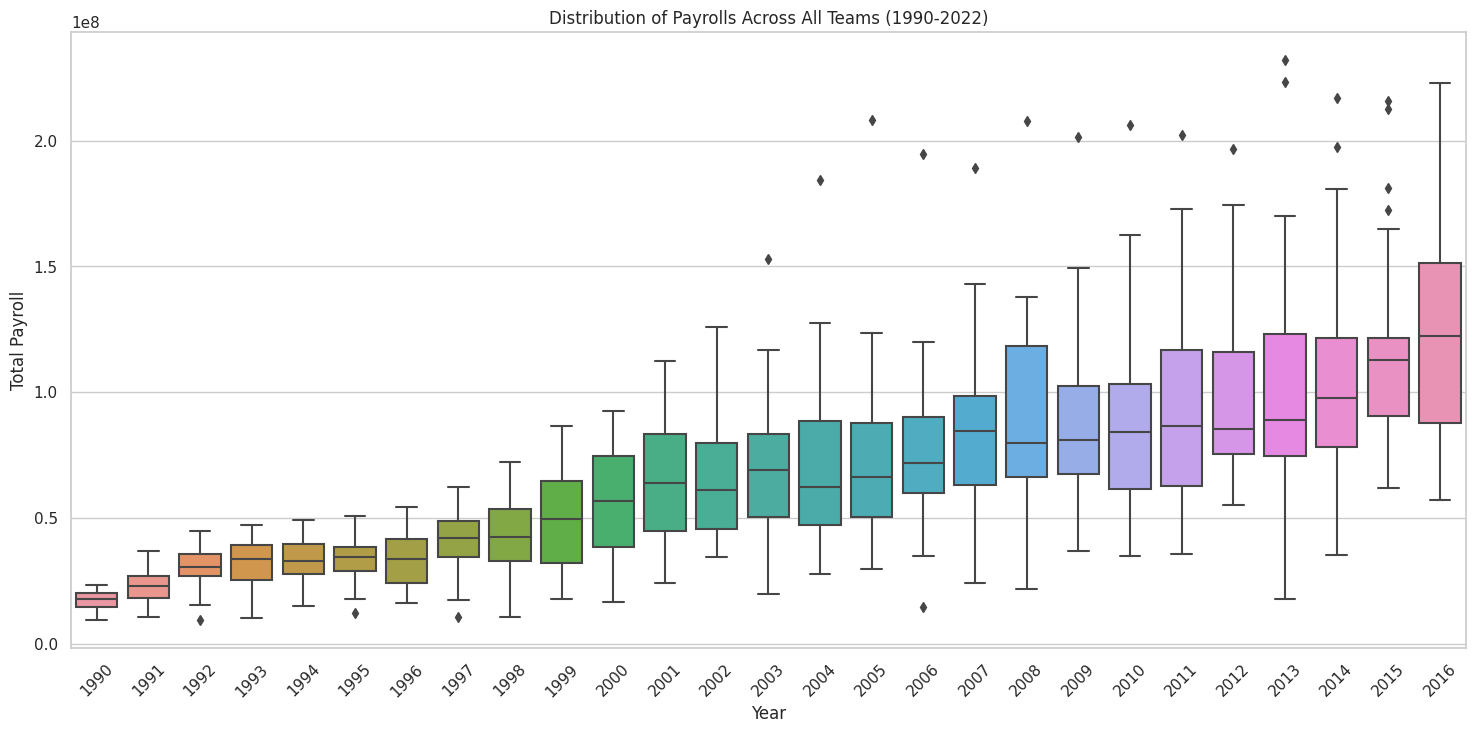

In [27]:
#BoxPlot
# Query to retrieve team salaries for all teams
salary_query_all = "SELECT teamID, yearID, sum(salary) as total_payroll FROM Salaries GROUP BY teamID, yearID"
team_salaries_all = pd.read_sql(salary_query_all, conn)

# Filter data for the years 1990-2022
team_salaries_all = team_salaries_all[(team_salaries_all['yearID'] >= 1990) & (team_salaries_all['yearID'] <= 2022)]

# Create a boxplot to show the distribution of payrolls across all teams each year
plt.figure(figsize=(18, 8))
sns.boxplot(x='yearID', y='total_payroll', data=team_salaries_all)
plt.title('Distribution of Payrolls Across All Teams (1990-2022)')
plt.xlabel('Year')
plt.ylabel('Total Payroll')
plt.xticks(rotation=45)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

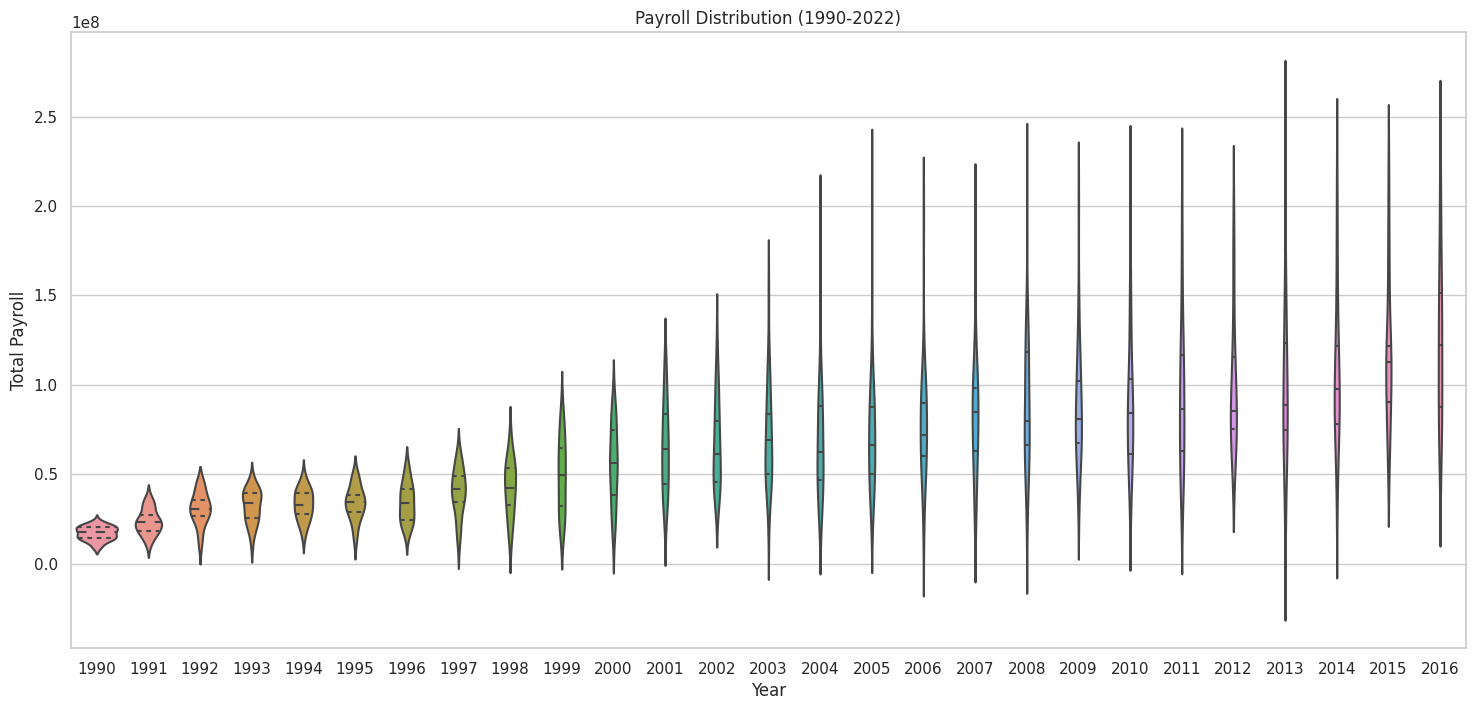

In [28]:
#ViolinPlot
sns.set(style="whitegrid")
plt.figure(figsize=(18,8))
sns.violinplot(x='yearID',y='total_payroll',data=team_salaries_all,inner='quartile')
plt.title("Payroll Distribution (1990-2022)")
plt.xlabel('Year')
plt.ylabel('Total Payroll')
plt.show

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 34.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 19.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 30.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 11.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


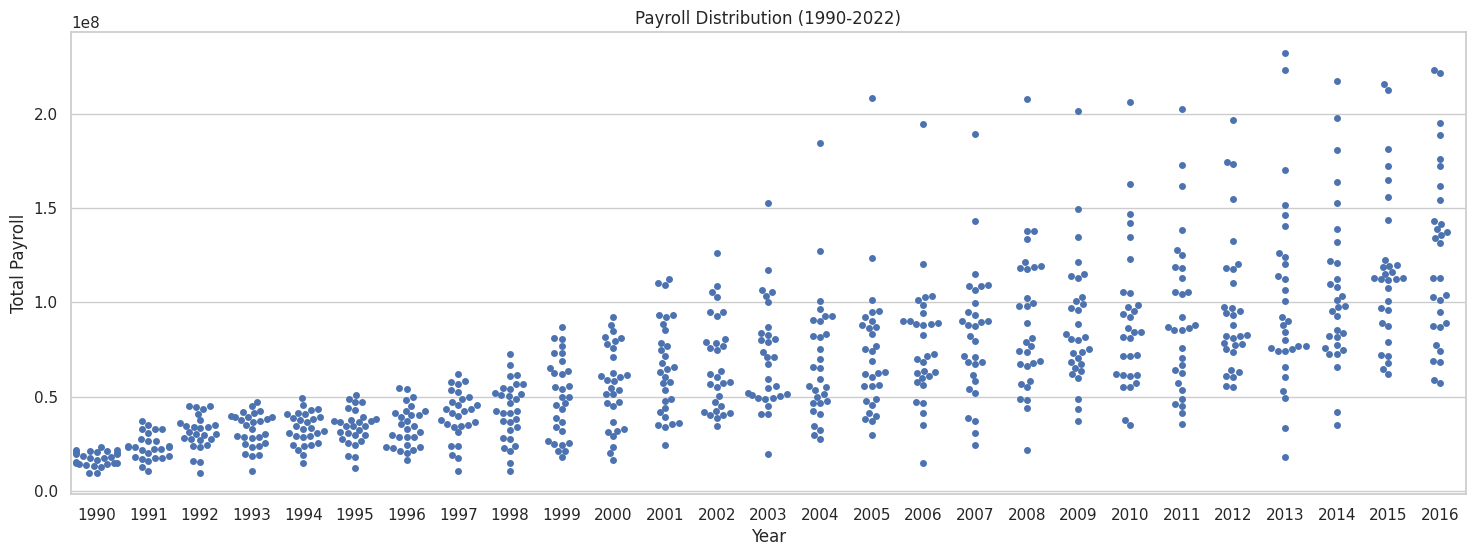

In [29]:
#SwarmPlot
sns.set(style="whitegrid")
plt.figure(figsize=(18,6))
sns.swarmplot(x='yearID', y='total_payroll', data=team_salaries_all)
plt.title("Payroll Distribution (1990-2022)")
plt.xlabel('Year')
plt.ylabel('Total Payroll')
plt.show

**Question1**



**BoxPlot**


Central Tendency:The boxplots for the teams show a general increasing trend in the median payroll over the years from 1990 to 2022. This suggests a rise in the central tendency of team payrolls over time.

Spread:Based on the interquartile range (IQR), wider IQR suggests greater variability in team payrolls for a specific year. The boxplots show some variability, with certain years having a wider spread of payrolls compared to others.

Outliers:Outliers, represented as individual points beyond the whiskers of the boxplots, can be identified. Outliers suggest instances where teams have exceptionally high or low payrolls compared to the majority. From 2003 to 2015 we can observe that there are teams that got paid higher than most of the teams.

The line plot of the average payroll across all teams over the years is an increasing or decreasing trend in the average payroll, suggests overall financial growth or decline in the league.




#**Problem 3**

<ipython-input-30-8eff61540025>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='yearID', y='total_payroll', data=payroll_by_year, estimator=np.median, ci=None,color='blue', label='Median Payroll')


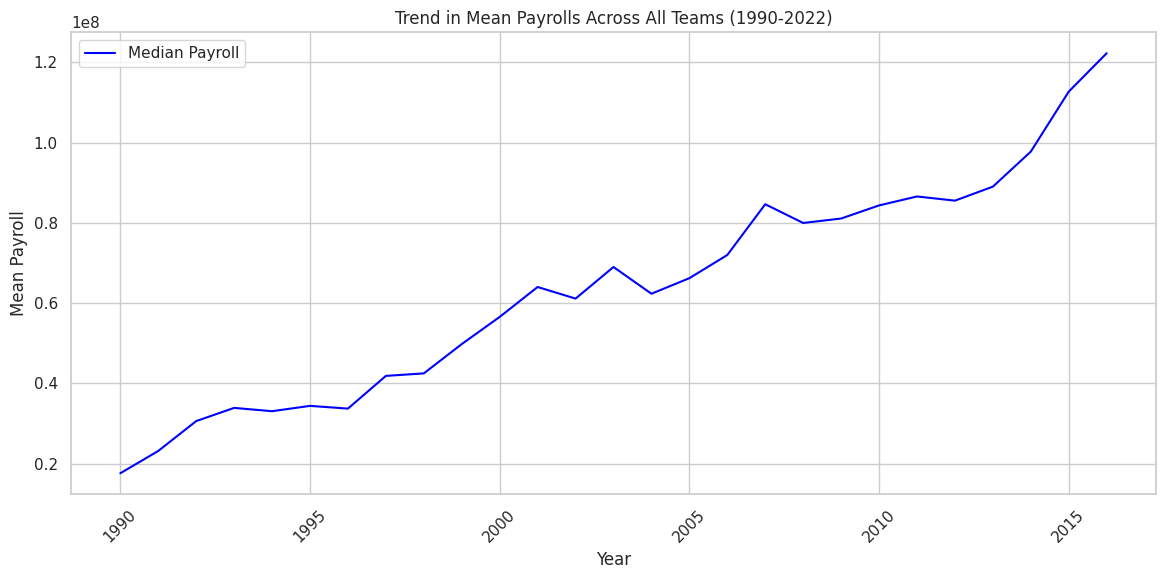

In [30]:
# Calculate mean payroll for each year
import numpy as np
payroll_by_year = team_salaries_all.groupby('yearID')['total_payroll'].median().reset_index()

# Create a line plot to show the trend of mean payrolls across all teams over time
plt.figure(figsize=(14, 6))
sns.lineplot(x='yearID', y='total_payroll', data=payroll_by_year, estimator=np.median, ci=None,color='blue', label='Median Payroll')
plt.title('Trend in Mean Payrolls Across All Teams (1990-2022)')
plt.xlabel('Year')
plt.ylabel('Mean Payroll')
plt.xticks(rotation=45)
plt.show()


In this plot, each point on the line represents the median total payroll for a specific year. You can visualize the increase in trend in the median payroll over the years from 1990 to 2022.

#**Problem 4**

In [40]:
#problem 4
team_data['time_period'] = pd.cut(team_data['yearID'], bins=5, labels=['Period 1', 'Period 2', 'Period 3', 'Period 4', 'Period 5'])

mean_data_by_period = team_data.groupby(['time_period', 'teamID']).agg(
    mean_winning_percentage=('winning_percentage', 'mean'),
    mean_total_payroll=('total_payroll', 'mean')
).reset_index()



<ipython-input-40-a2d3944126c6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_data['time_period'] = pd.cut(team_data['yearID'], bins=5, labels=['Period 1', 'Period 2', 'Period 3', 'Period 4', 'Period 5'])


In [42]:
mean_data_by_period = mean_data_by_period.dropna(subset = ['mean_total_payroll', 'mean_winning_percentage'])

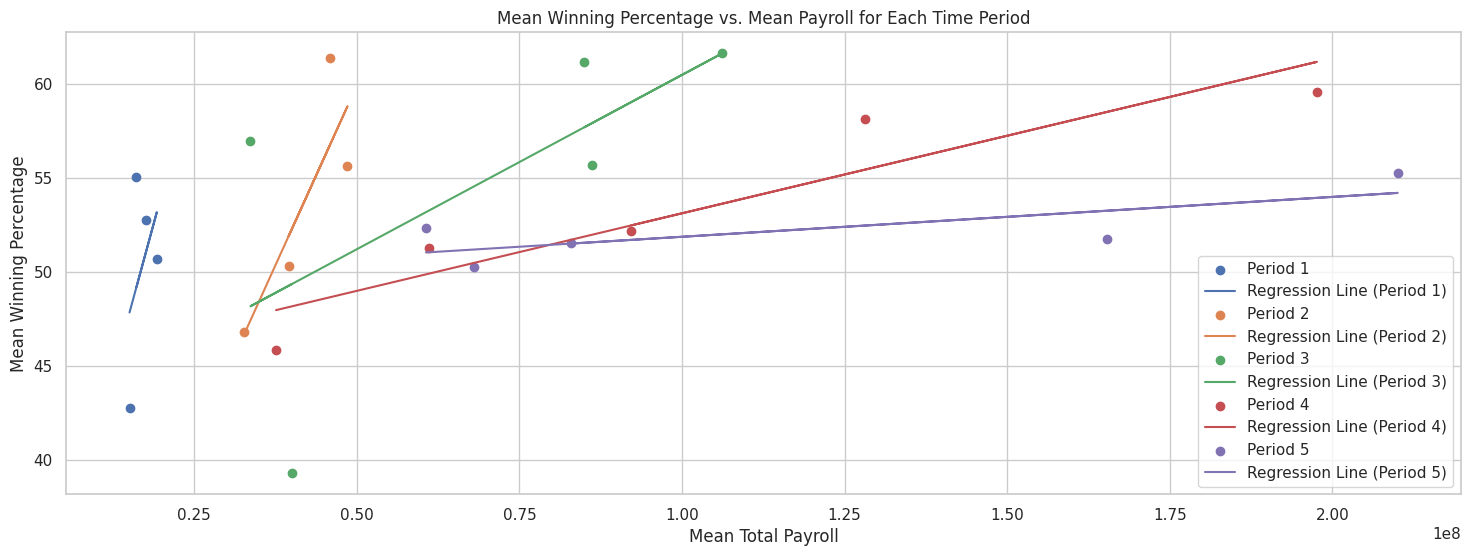

In [43]:
plt.figure(figsize=(18,6))

for period in mean_data_by_period['time_period'].unique():
    subset_data = mean_data_by_period[mean_data_by_period['time_period'] == period]

    # Add regression line using NumPy's polyfit
    slope, intercept = np.polyfit(subset_data['mean_total_payroll'], subset_data['mean_winning_percentage'], 1)
    regression_line = np.polyval([slope, intercept], subset_data['mean_total_payroll'])

    plt.scatter(subset_data['mean_total_payroll'], subset_data['mean_winning_percentage'], label=period)
    plt.plot(subset_data['mean_total_payroll'], regression_line, label=f'Regression Line ({period})', linestyle='-')

plt.title('Mean Winning Percentage vs. Mean Payroll for Each Time Period')
plt.xlabel('Mean Total Payroll')
plt.ylabel('Mean Winning Percentage')
plt.legend()
plt.show()

**Question 2**


The provided code discretizes the years into five time periods and explores the relationship between mean winning percentage and mean total payroll for each period, employing scatter plots with regression lines. The resulting visualization allows for an assessment of the general trends in team efficiency in converting payroll into wins over time. Notable observations include differences in regression line slopes and intercepts across periods, indicating varying dynamics in the relationship between spending and performance. Teams that consistently outperform or underperform relative to the regression lines may be identified, shedding light on their efficiency in utilizing payroll for success.

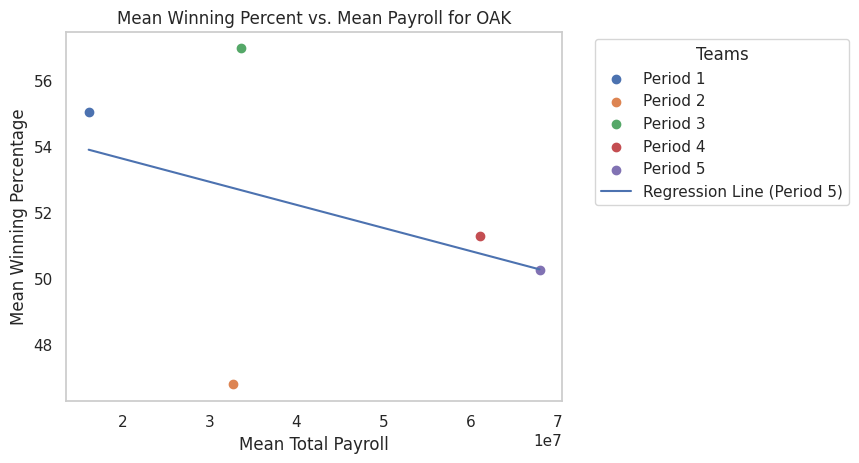

In [44]:
# Oakland A
oakland_data = mean_data_by_period[mean_data_by_period['teamID'] == 'OAK']
for period in oakland_data['time_period']:
    period_data = oakland_data[oakland_data['time_period'] == period]

    plt.scatter(period_data['mean_total_payroll'], period_data['mean_winning_percentage'], label=period)

slope, intercept = np.polyfit(oakland_data['mean_total_payroll'], oakland_data['mean_winning_percentage'], 1)
regression_line = np.polyval([slope, intercept], oakland_data['mean_total_payroll'])

# plotting the regression line
plt.plot(oakland_data['mean_total_payroll'], regression_line, label=f'Regression Line ({period})')

plt.title('Mean Winning Percent vs. Mean Payroll for OAK')
plt.xlabel('Mean Total Payroll')
plt.ylabel('Mean Winning Percentage')
plt.grid()
plt.legend(title='Teams', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Based on the given data, the Oakland A's mean winning percentage increases as their mean payroll increases. This trend can be observed in the scatterplot where the data points appear to form a line. This result suggests that the A's are more likely to have higher winning percentages when they spend more on player salaries.

#**Part 3: Problem 5**

In [46]:
# Calculate standardized payroll for each team conditioned on the year
yearly_stats = team_data.groupby('yearID')['total_payroll'].agg(['mean', 'std']).reset_index()
yearly_stats.columns = ['yearID', 'avg_payroll_yearly_stats', 'std_payroll_yearly_stats']

team_data = pd.merge(team_data, yearly_stats, on='yearID')

team_data['standardized_payroll'] = (team_data['total_payroll'] - team_data['avg_payroll_yearly_stats']) / team_data['std_payroll_yearly_stats']

team_data

,teamID,yearID,total_payroll,franchID,wins,games_played,winning_percentage,time_period,avg_payroll_yearly_stats_x,std_payroll_yearly_stats_x,standardized_payroll,avg_payroll,std_payroll,expected_win_pct,efficiency,avg_payroll_yearly_stats_y,std_payroll_yearly_stats_y,avg_payroll_yearly_stats,std_payroll_yearly_stats
0,ATL,1985,14807000.0,ATL,66,162,40.740741,Period 1,1.007557e+07,2.470845e+06,0.933450,1.225034e+07,2.738935e+06,52.333624,-14.046522,1.225034e+07,2.738935e+06,1.225034e+07,2.738935e+06
1,BOS,1985,10897560.0,BOS,81,163,49.693252,Period 1,1.007557e+07,2.470845e+06,-0.493908,1.225034e+07,2.738935e+06,48.765229,-1.138442,1.225034e+07,2.738935e+06,1.225034e+07,2.738935e+06
2,NYA,1985,14238204.0,NYY,97,161,60.248447,Period 1,1.007557e+07,2.470845e+06,0.725779,1.225034e+07,2.738935e+06,51.814448,6.036692,1.225034e+07,2.738935e+06,1.225034e+07,2.738935e+06
3,OAK,1985,9058606.0,OAK,77,162,47.530864,Period 1,1.007557e+07,2.470845e+06,-1.165320,1.225034e+07,2.738935e+06,47.086699,-1.440177,1.225034e+07,2.738935e+06,1.225034e+07,2.738935e+06
4,ATL,1986,17102786.0,ATL,72,161,44.720497,Period 1,1.184056e+07,3.186956e+06,0.562045,1.494467e+07,3.839750e+06,51.405112,-9.407444,1.494467e+07,3.839750e+06,1.494467e+07,3.839750e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,ATL,2016,68498291.0,ATL,68,161,42.236025,Period 5,1.250046e+08,4.663199e+07,-0.743905,1.247891e+08,7.566933e+07,48.140238,-4.734602,1.247891e+08,7.566933e+07,1.247891e+08,7.566933e+07
143,BOS,2016,188545761.0,BOS,93,162,57.407407,Period 5,1.250046e+08,4.663199e+07,0.842570,1.247891e+08,7.566933e+07,52.106424,4.000884,1.247891e+08,7.566933e+07,1.247891e+08,7.566933e+07
144,NYA,2016,222997792.0,NYY,84,162,51.851852,Period 5,1.250046e+08,4.663199e+07,1.297867,1.247891e+08,7.566933e+07,53.244667,-3.401688,1.247891e+08,7.566933e+07,1.247891e+08,7.566933e+07
145,OAK,2016,86806234.0,OAK,69,162,42.592593,Period 5,1.250046e+08,4.663199e+07,-0.501958,1.247891e+08,7.566933e+07,48.745104,-5.359546,1.247891e+08,7.566933e+07,1.247891e+08,7.566933e+07


#**Problem 6**

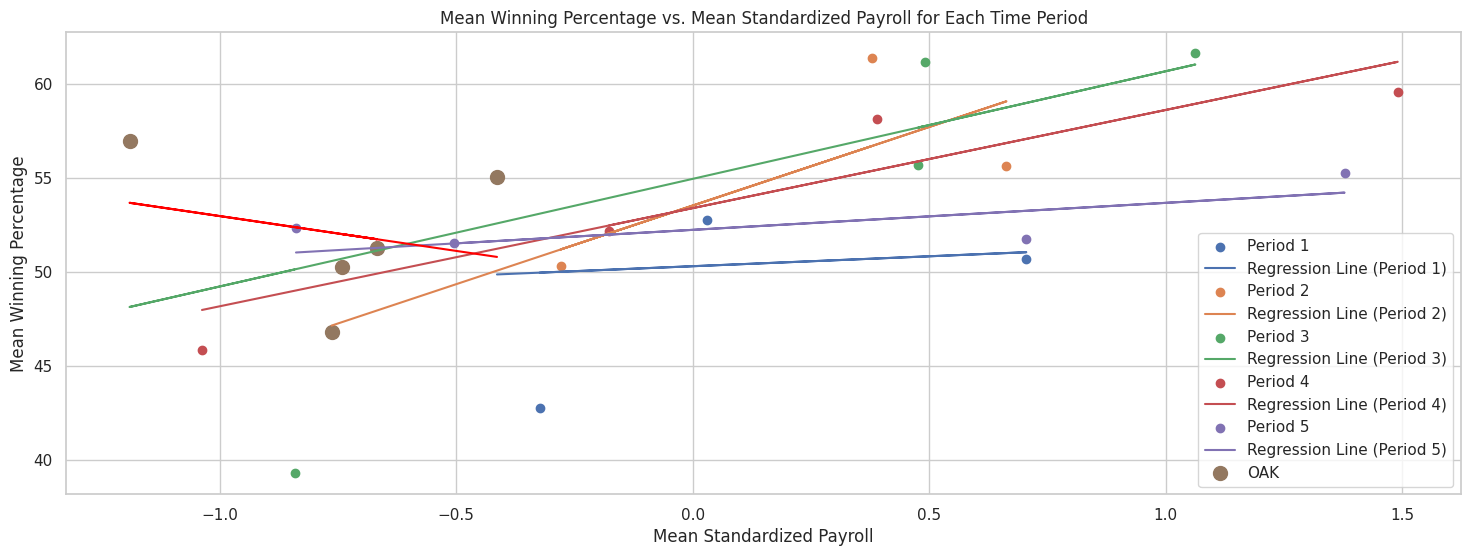

In [47]:
# #problem 6
team_data['time_period'] = pd.cut(team_data['yearID'], bins=5, labels=['Period 1', 'Period 2', 'Period 3', 'Period 4', 'Period 5'])

team_data = team_data.groupby(['time_period', 'teamID']).agg(
    mean_winning_percentage=('winning_percentage', 'mean'),
    mean_standardized_payroll=('standardized_payroll', 'mean')
).reset_index()


team_data = team_data.dropna(subset = ['mean_standardized_payroll', 'mean_winning_percentage'])

# Plot scatter plots and regression lines
plt.figure(figsize=(18, 6))

for period in mean_data_by_period['time_period'].unique():
    subset_data = team_data[team_data['time_period'] == period]

    slope, intercept = np.polyfit(subset_data['mean_standardized_payroll'], subset_data['mean_winning_percentage'], 1)
    regression_line = np.polyval([slope, intercept], subset_data['mean_standardized_payroll'])

    plt.scatter(subset_data['mean_standardized_payroll'], subset_data['mean_winning_percentage'], label=period)
    plt.plot(subset_data['mean_standardized_payroll'], regression_line, label=f'Regression Line ({period})', linestyle='-')

oakland_data = team_data[team_data['teamID'] == 'OAK']
slope_oakland, intercept_oakland = np.polyfit(oakland_data['mean_standardized_payroll'], oakland_data['mean_winning_percentage'], 1)
regression_line_oakland = np.polyval([slope_oakland, intercept_oakland], oakland_data['mean_standardized_payroll'])

plt.scatter(oakland_data['mean_standardized_payroll'], oakland_data['mean_winning_percentage'], label='OAK', marker='o', s=100)
plt.plot(oakland_data['mean_standardized_payroll'], regression_line_oakland, linestyle='-', color='red')

plt.title('Mean Winning Percentage vs. Mean Standardized Payroll for Each Time Period')
plt.xlabel('Mean Standardized Payroll')
plt.ylabel('Mean Winning Percentage')
plt.legend()
plt.show()


**Question 3**

In Problem 4, the scatter plots and regression lines were created using the original payroll variable (total_payroll). In contrast, Problem 6 involved creating plots using the standardized payroll variable (standardized_payroll), which was obtained by standardizing the payroll variable conditioned on the year.
 Standardizing the payroll allows for a more meaningful comparison of teams' spending efficiency across years.Which is done in problem 6.

 Problem 6 enhances the interpretability of the plots by allowing a more accurate assessment of how team spending relates to performance over time, independent of overall changes in payroll values.


#**Problem 7**

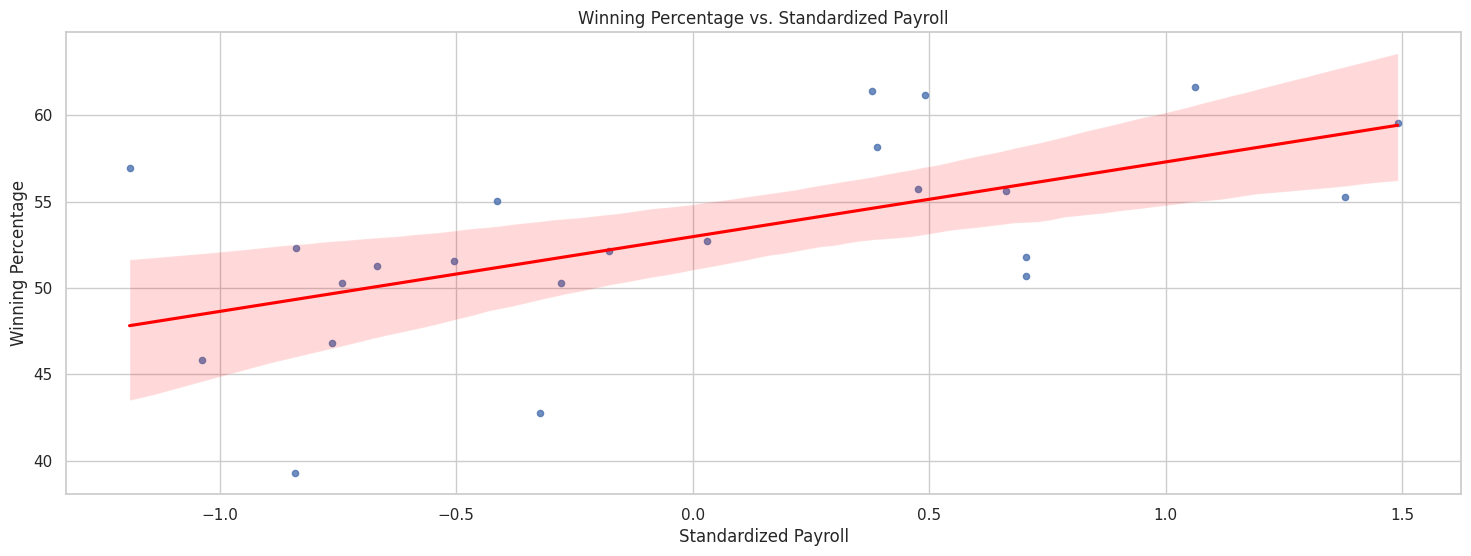

In [48]:
# Scatter plot and regression line
plt.figure(figsize=(18,6))
sns.regplot(x='mean_standardized_payroll', y='mean_winning_percentage', data=team_data, scatter_kws={'s': 20}, line_kws={'color': 'red'})

plt.title('Winning Percentage vs. Standardized Payroll')
plt.xlabel('Standardized Payroll')
plt.ylabel('Winning Percentage')
plt.grid(True)
plt.show()

#**Problem 8**

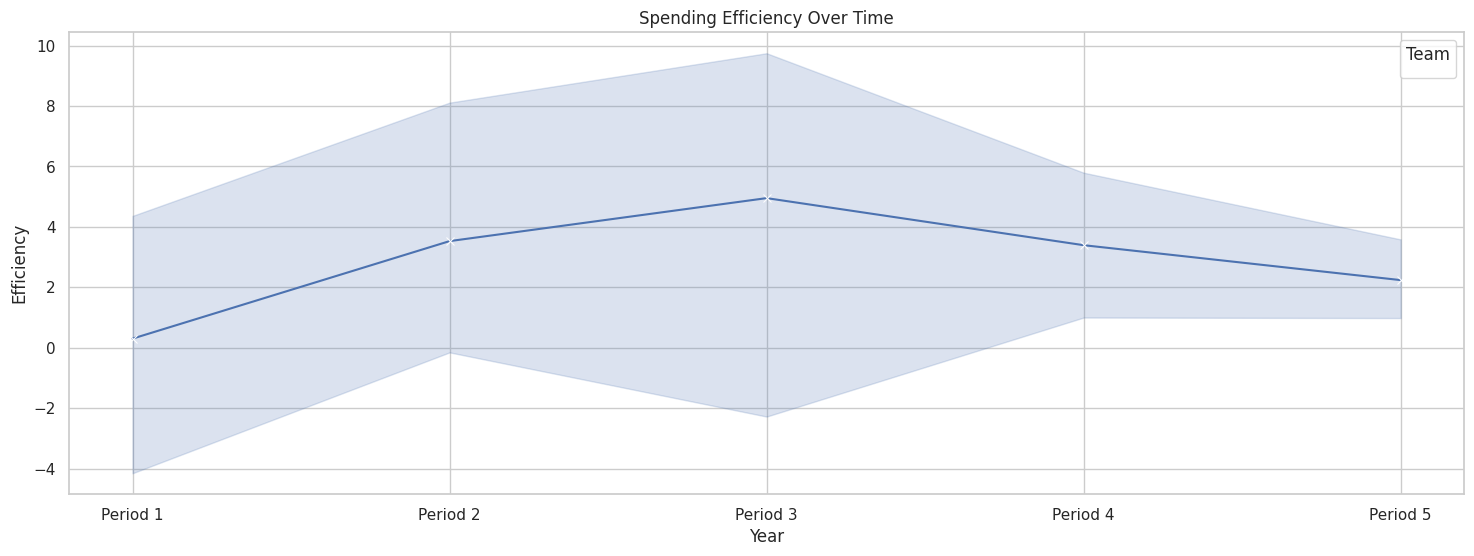

In [50]:
def calculate_efficiency(row):
  expected_win_pct = 50+2.5*row['mean_standardized_payroll']
  efficiency = row['mean_winning_percentage']-expected_win_pct
  return efficiency

team_data['efficiency']= team_data.apply(calculate_efficiency,axis=1)
selected_teams=['OAK','BOS','NYA','ATL','TBA']
selected_teams_data= team_data[team_data['teamID'].isin(selected_teams)]

plt.figure(figsize=(18,6))
sns.lineplot(x='time_period',y='efficiency',data= selected_teams_data, marker='x')
plt.title('Spending Efficiency Over Time')
plt.xlabel('Year')
plt.ylabel('Efficiency')
plt.legend(title='Team')
plt.grid(True)
plt.show()


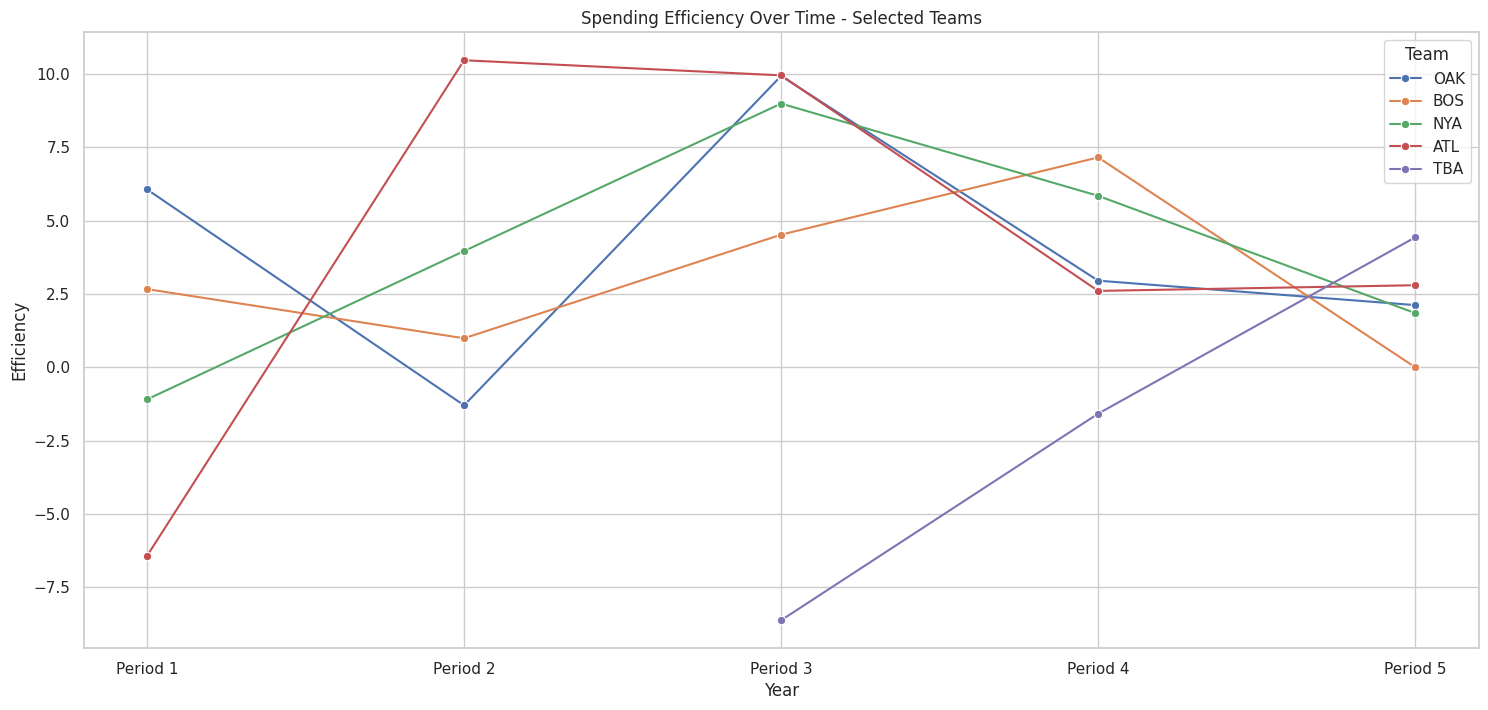

In [51]:
# Define a function to calculate efficiency for each row
def calculate_efficiency(row):
    expected_win_pct = 50 + 2.5 * row['mean_standardized_payroll']
    efficiency = row['mean_winning_percentage'] - expected_win_pct
    return efficiency

team_data['efficiency'] = team_data.apply(calculate_efficiency, axis=1)

selected_teams = ['OAK', 'BOS', 'NYA', 'ATL', 'TBA']

plt.figure(figsize=(18, 8))
for team in selected_teams:
    team_data_subset = team_data[team_data['teamID'] == team]
    sns.lineplot(x='time_period', y='efficiency', data=team_data_subset, label=team, marker='o')

plt.title('Spending Efficiency Over Time - Selected Teams')
plt.xlabel('Year')
plt.ylabel('Efficiency')
plt.legend(title='Team')
plt.grid(True)
plt.show()


**Question 4**


During the Moneyball period (2002-2003), that is during period3,the efficiency line for Oakland is notably higher compared to other teams. This suggests that the Oakland's were particularly effective in translating their payroll into wins during this period.



In order to determine Oakland's level of effectiveness throughout the Moneyball era, it is crucial to keep in mind that the focus of Moneyball is the 2002 season. Plot demonstrates that Oakland's team efficiency was close to 10 throughout that period, indicating that it was a strong showing in comparison to previous years. But it's important to remember that Oakland had the second-lowest payroll in Major League Baseball that season, so they had to put player efficiency and development first. Their mediocre work is all the more remarkable for this.
